In [1]:
import matplotlib.pyplot as plt
import requests as req
import time
import pandas as pd

In [2]:
store = []
for i in range(100):
    resp = req.get("http://api.open-notify.org/iss-now.json")
    respdata= resp.json()
    store.append((respdata["timestamp"], respdata["iss_position"]["latitude"], respdata["iss_position"]["longitude"]))
    time.sleep(10)

In [3]:
print (store)

[(1657638608, '-43.2856', '-79.2306'), (1657638619, '-43.6370', '-78.4758'), (1657638629, '-43.9829', '-77.7116'), (1657638639, '-44.3068', '-76.9750'), (1657638650, '-44.6412', '-76.1925'), (1657638660, '-44.9696', '-75.4003'), (1657638671, '-45.2919', '-74.5986'), (1657638681, '-45.6078', '-73.7873'), (1657638692, '-45.9172', '-72.9664'), (1657638702, '-46.2200', '-72.1360'), (1657638713, '-46.5160', '-71.2961'), (1657638723, '-46.8053', '-70.4461'), (1657638734, '-47.0875', '-69.5869'), (1657638744, '-47.3495', '-68.7600'), (1657638754, '-47.6174', '-67.8823'), (1657638765, '-47.8781', '-66.9947'), (1657638775, '-48.1311', '-66.0982'), (1657638786, '-48.3762', '-65.1927'), (1657638796, '-48.6024', '-64.3218'), (1657638806, '-48.8319', '-63.3989'), (1657638817, '-49.0533', '-62.4672'), (1657638828, '-49.2664', '-61.5270'), (1657638838, '-49.4711', '-60.5784'), (1657638848, '-49.6581', '-59.6670'), (1657638859, '-49.8459', '-58.7025'), (1657638869, '-50.0249', '-57.7303'), (1657638880

In [4]:
df = pd.DataFrame(store, columns = ["Timestamp","Latitude","Longitude"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  100 non-null    int64 
 1   Latitude   100 non-null    object
 2   Longitude  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [5]:
df[['Latitude','Longitude']] = df[['Latitude','Longitude']].apply(pd.to_numeric)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  100 non-null    int64  
 1   Latitude   100 non-null    float64
 2   Longitude  100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
x = df['Latitude']
y = df['Longitude']
labels = df['Timestamp']

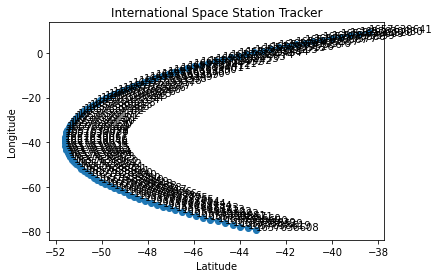

In [8]:
plt.scatter(x,y)
plt.plot(x,y)
plt.title("International Space Station Tracker")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

for i, txt in labels.items():
    plt.annotate(txt, xy=(x[i],y[i]))
   

plt.show()
